In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

## Task1

In [3]:
df = pd.read_csv('dastasets/sendy_logistics.csv')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
df['Temp_Diff'] = df['Temperature'] - 21
df.head()

In [6]:
df['Fehr_Temp']= (df['Temperature']*1.8) + 32
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Temp_Diff,Fehr_Temp
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,-0.6,68.72
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,5.4,79.52
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,NaN,NaN
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,-1.8,66.56
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,-5.6,59.72


## Task2

In [12]:
df2 = pd.read_csv('dastasets/ufo.csv')
df2.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [18]:
df2['Time']=pd.to_datetime(df2['Time'],format='%m/%d/%Y %H:%M')
df2.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [35]:
def IN_December(x):
    if x == 'December':
        return 1
    else:
        return 0

In [36]:
df2['month_name']=df2['Time'].dt.month_name()
df2['IN_December']=df2['month_name'].apply(IN_December)
df2.head()

,City,Colors Reported,Shape Reported,State,Time,month_name,IN_December
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,June,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,June,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,February,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,June,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,April,0


In [53]:
df2['Time_Diff_From_WW1'] = (df2['Time']-datetime(1914,7,28))/np.timedelta64(1,'Y')
df2.head()

,City,Colors Reported,Shape Reported,State,Time,month_name,IN_December,Time_Diff_From_WW1
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,June,0,15.846778
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,June,0,15.925949
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,February,0,16.554983
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,June,0,16.845087
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,April,0,18.726714


## Task 3

In [56]:
df3 = pd.read_csv('dastasets/titanic_full.csv')
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df3['Title'] = df3['Name'].apply(lambda x:x.split('.')[0].split(',')[1])
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [90]:
sns.set(rc={'figure.figsize': [17, 17]}, font_scale=1)

<AxesSubplot:xlabel='Title', ylabel='count'>

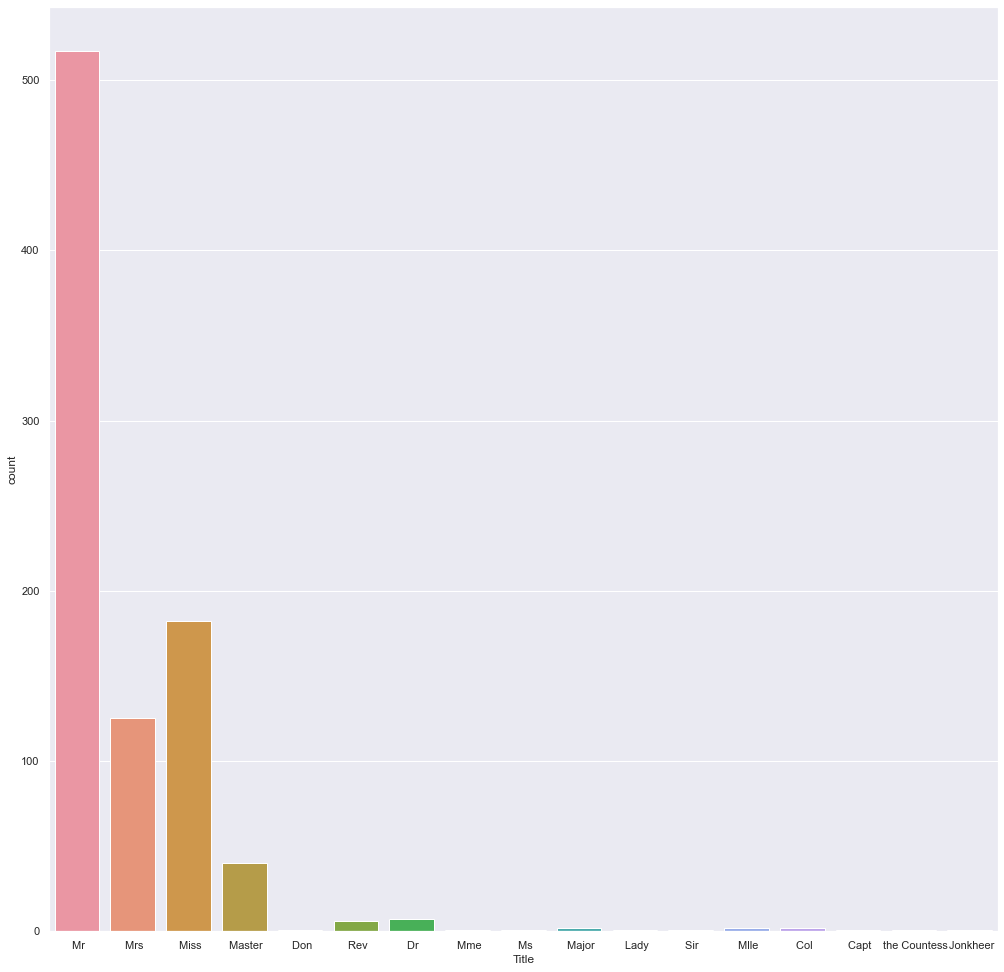

In [91]:
sns.countplot(x='Title',data=df3)

In [101]:
df['ID']=df['User Id'].apply(lambda x:x.split('_')[2])
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Temp_Diff,Fehr_Temp,ID
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,-0.6,68.72,633
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,5.4,79.52,2285
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,NaN,NaN,265
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,-1.8,66.56,1402
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,-5.6,59.72,1737


## Task4

In [110]:
df4 = pd.read_csv('dastasets/visitor-interests.csv')
df4 =df4.head(50)
df4.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [111]:
import user_agents
def extract_browser(x):
    
    ua=user_agents.parse(x)
    return pd.Series((ua.browser.family,ua.os.family,ua.device.family))

df4[['Browser','Os','Device']]=df4['UserAgent'].apply(extract_browser)
df4.head()

,IP,UserAgent,Country,Languages,Interests,Browser,Os,Device
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,Chrome,Windows,Other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Chrome,Windows,Other
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Chrome,Windows,Other
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Chrome,Android,Nexus 9
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad


In [116]:
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo

In [138]:
df4['latitude']=df4['IP'].apply(lambda x:ip2geo.get(x,api_key='free').latitude)
df4['longitude']=df4['IP'].apply(lambda x:ip2geo.get(x,api_key='free').longitude)
df4.head()

,IP,UserAgent,Country,Languages,Interests,Browser,Os,Device,country,latitude,longitude,eg_lat,eg_log
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,Chrome,Windows,Other,TH,NaN,NaN,26.820553,30.802498
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Chrome,Windows,Other,TH,NaN,NaN,26.820553,30.802498
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Chrome,Windows,Other,JP,35.643227,139.740055,26.820553,30.802498
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Chrome,Android,Nexus 9,AU,-34.928181,138.599931,26.820553,30.802498
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad,AU,-33.822567,151.192340,26.820553,30.802498


In [121]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IP         50 non-null     object 
 1   UserAgent  50 non-null     object 
 2   Country    50 non-null     object 
 3   Languages  50 non-null     object 
 4   Interests  50 non-null     object 
 5   Browser    50 non-null     object 
 6   Os         50 non-null     object 
 7   Device     50 non-null     object 
 8   country    50 non-null     object 
 9   latitude   48 non-null     float64
 10  longitude  48 non-null     float64
dtypes: float64(2), object(9)
memory usage: 4.4+ KB


## Task 5

In [119]:
from geopy.distance import great_circle

In [125]:
df4['eg_lat'] = 26.820553
df4['eg_log'] = 30.802498
df4.head()

,IP,UserAgent,Country,Languages,Interests,Browser,Os,Device,country,latitude,longitude,eg_lat,eg_log
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,Chrome,Windows,Other,TH,NaN,NaN,26.820553,30.802498
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Chrome,Windows,Other,TH,NaN,NaN,26.820553,30.802498
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Chrome,Windows,Other,JP,35.643227,139.740055,26.820553,30.802498
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Chrome,Android,Nexus 9,AU,-34.928181,138.599931,26.820553,30.802498
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad,AU,-33.822567,151.192340,26.820553,30.802498


In [146]:
df4=df4.dropna()
df4.head()

,IP,UserAgent,Country,Languages,Interests,Browser,Os,Device,country,latitude,longitude,eg_lat,eg_log
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Chrome,Windows,Other,JP,35.643227,139.740055,26.820553,30.802498
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Chrome,Android,Nexus 9,AU,-34.928181,138.599931,26.820553,30.802498
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad,AU,-33.822567,151.192340,26.820553,30.802498
5,1.124.48.210,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,Samsung Internet,Android,Samsung SM-G900I,AU,-34.928181,138.599931,26.820553,30.802498
6,1.124.48.99,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,Samsung Internet,Android,Samsung SM-G900I,AU,-34.928181,138.599931,26.820553,30.802498


In [147]:
def extract_dist(x):
    return great_circle((x['latitude'],x['longitude']),(x['eg_lat'],x['eg_log'])).kilometers
df4['Distance (km)']=df4.apply(extract_dist,axis=1)
df4.head()

<ipython-input-147-280a549709df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Distance (km)']=df4.apply(extract_dist,axis=1)


,IP,UserAgent,Country,Languages,Interests,Browser,Os,Device,country,latitude,longitude,eg_lat,eg_log,Distance (km)
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Chrome,Windows,Other,JP,35.643227,139.740055,26.820553,30.802498,9831.936511
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Chrome,Android,Nexus 9,AU,-34.928181,138.599931,26.820553,30.802498,13211.551473
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad,AU,-33.822567,151.192340,26.820553,30.802498,14318.662629
5,1.124.48.210,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,Samsung Internet,Android,Samsung SM-G900I,AU,-34.928181,138.599931,26.820553,30.802498,13211.551473
6,1.124.48.99,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,Samsung Internet,Android,Samsung SM-G900I,AU,-34.928181,138.599931,26.820553,30.802498,13211.551473


# Thank you